In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import rcParams, style
import matplotlib.image as mpimg


style.use('default')
rcParams['axes.labelsize'] = 20
rcParams['xtick.major.size'] = 5
rcParams['xtick.labelsize'] = 20
rcParams['ytick.major.size'] = 5
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize'] = 15
#rcParams["legend.handletextpad"] = 0.02

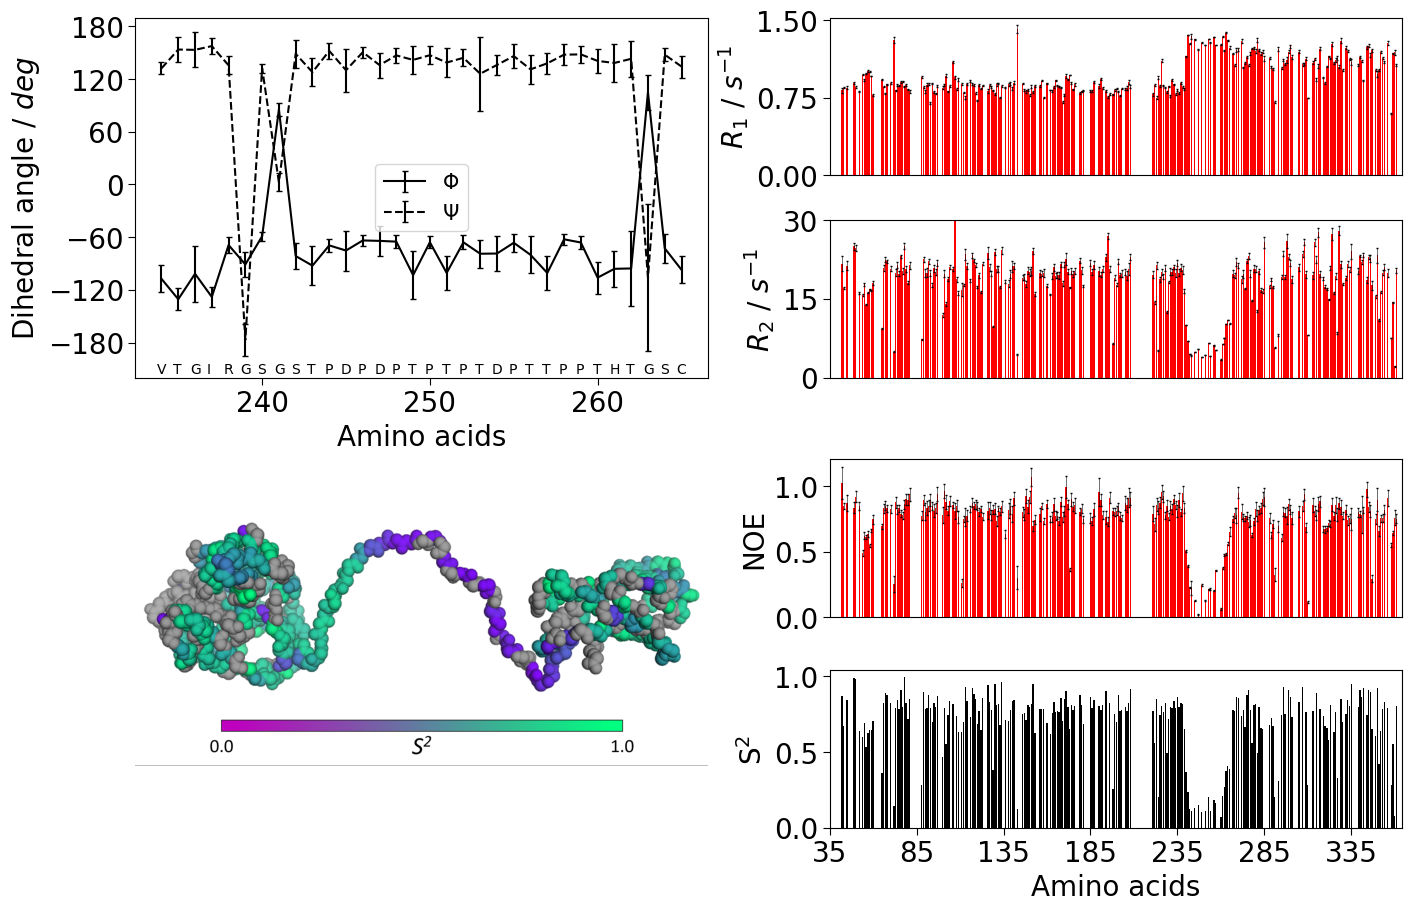

In [75]:
fig, ax = plt.subplot_mosaic([['a', 'a', 'b', 'b'],
                              ['a', 'a', 'c', 'c'],
                              ['f', 'f', 'd', 'd'],
                              ['f', 'f', 'e', 'e']         
                             ],
                              figsize=(14, 9), layout="constrained")
img = mpimg.imread('snapshot.png')
ax['f'].imshow(img)
ax['f'].axis('off')


#fig.subplots_adjust(left=0.2, wspace=0.8)
#fig.align_ylabels(axs)



talos_data = np.genfromtxt('talos_results.tab', usecols=(0,1, 2,3,4,5))
talos_data = np.where(talos_data==9999.000, np.nan, talos_data)


def plot_data(angle):
    if angle=='phi':
        a = 2
        fmt = 'k-'
        label = r'$\Phi$'
    elif angle=='psi':
        a = 3
        fmt = 'k--'
        label = r'$\Psi$'

    ax['a'].errorbar(talos_data[:,0]+34, talos_data[:,a], yerr=talos_data[:,a+2], fmt=fmt, capsize=2, label=label)
    ax['a'].set_xlabel('Amino acids')
    ax['a'].set_ylabel('Dihedral angle / $deg$')
    ax['a'].set_yticks(np.linspace(-180, 180, num=7))



plot_data('phi')
plot_data('psi')

residues = np.loadtxt('talos_results.tab', usecols=1, dtype=str)
for i,j in zip(talos_data[:,0]+34, residues):
    ax['a'].text(i-0.3, -215, j, ma='left')
ax['a'].set_ylim(-220, 190 )
ax['a'].legend(loc='center')





# plot relaxation
df = pd.read_csv('relaxation_results.csv', index_col=0)

errorbars = {
    'ecolor':'black',
    'capsize':0.6,
    'elinewidth':0.4
    }

shift = 34
nres = df['res'] + shift
minx = 1 + shift
maxx = 330 + shift

ax1 = ax['b']
ax1.set_ylabel(r'$R_{1}$ / $s^{-1}$')
ax1.set_xticks([])
ax1.bar(nres, df['R1'], yerr=df['R1_err'], color='red', width=0.8, error_kw=errorbars)
ax1.set_yticks([0,0.75,1.5])
ax1.set_xlim(minx,maxx)

ax2 = ax['c']
ax2.set_ylabel(r'$R_{2}$ / $s^{-1}$')
ax2.bar(nres, df['R2'], yerr=df['R2_err'], color='red', width=0.8, error_kw=errorbars)
ax2.set_xticks([])
ax2.set_ylim(0,30)
ax2.set_yticks([0,15,30])
ax2.set_xlim(minx,maxx)

ax3 = ax['d']
ax3.bar(nres, df['NOE'], yerr=df['NOE_err'], color='red', width=0.8, error_kw=errorbars)
ax3.set_ylabel(r'NOE')
ax3.set_xticks([])
ax3.set_yticks([0,0.5,1.0])
ax3.set_xlim(minx,maxx)

ax4 = ax['e']
ax4.bar(nres, df['S2'], color='black', width=0.8)
ax4.set_ylabel(r'S$^{2}$')
ax4.set_xlabel('Amino acids')
ax4.set_xticks(np.arange(minx, maxx, step=50))
ax4.set_yticks([0,0.5,1.0])
ax4.set_xlim(minx,maxx)



plt.savefig('nmr_figures.png', dpi=300)
plt.show()


In [61]:
df['S2'].min()

0.0694587279833978